<a href="https://colab.research.google.com/github/kiradawa/malware-classification/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name: Mahmood Yaghi


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

!pip install --upgrade category_encoders #package installation
import category_encoders as ce

#CIC-Darknet2020 dataset analysis

In [ ]:
data3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data vis project/files/data4/Darknet.csv')
data3

Flow ID          Src IP  Src Port  \
0          10.152.152.11-216.58.220.99-57158-443-6   10.152.152.11     57158   
1          10.152.152.11-216.58.220.99-57159-443-6   10.152.152.11     57159   
2          10.152.152.11-216.58.220.99-57160-443-6   10.152.152.11     57160   
3         10.152.152.11-74.125.136.120-49134-443-6   10.152.152.11     49134   
4       10.152.152.11-173.194.65.127-34697-19305-6   10.152.152.11     34697   
...                                            ...             ...       ...   
141525        10.8.8.246-224.0.0.252-55219-5355-17      10.8.8.246     55219   
141526        10.8.8.246-224.0.0.252-64207-5355-17      10.8.8.246     64207   
141527        10.8.8.246-224.0.0.252-61115-5355-17      10.8.8.246     61115   
141528        10.8.8.246-224.0.0.252-64790-5355-17      10.8.8.246     64790   
141529    80.239.235.110-10.8.8.246-11666-60245-17  80.239.235.110     11666   

                Dst IP  Dst Port  Protocol               Timestamp  \
0        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
1        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
2        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
3       74.125.136.120       443         6  24/07/2015 04:09:48 PM   
4       173.194.65.127     19305         6  24/07/2015 04:09:45 PM   
...                ...       ...       ...                     ...   
141525     224.0.0.252      5355        17  22/05/2015 01:55:03 PM   
141526     224.0.0.252      5355        17  22/05/2015 02:09:05 PM   
141527     224.0.0.252      5355        17  22/05/2015 02:19:31 PM   
141528     224.0.0.252      5355        17  22/05/2015 02:29:55 PM   
141529      10.8.8.246     60245        17  22/05/2015 02:31:23 PM   

        Flow Duration  Total Fwd Packet  Total Bwd packets  ...  Active Mean  \
0                 229                 1                  1  ...            0   
1                 407                 1                  1  ...            0   
2                 431                 1                  1  ...            0   
3                 359                 1                  1  ...            0   
4            10778451               591                400  ...            0   
...               ...               ...                ...  ...          ...   
141525         411806                 2                  0  ...            0   
141526         411574                 2                  0  ...            0   
141527         422299                 2                  0  ...            0   
141528         411855                 2                  0  ...            0   
141529      119990044              5995               6000  ...            0   

        Active Std  Active Max  Active Min     Idle Mean      Idle Std  \
0                0           0           0  0.000000e+00  0.000000e+00   
1                0           0           0  0.000000e+00  0.000000e+00   
2                0           0           0  0.000000e+00  0.000000e+00   
3                0           0           0  0.000000e+00  0.000000e+00   
4                0           0           0  1.437760e+15  3.117718e+06   
...            ...         ...         ...           ...           ...   
141525           0           0           0  0.000000e+00  0.000000e+00   
141526           0           0           0  0.000000e+00  0.000000e+00   
141527           0           0           0  0.000000e+00  0.000000e+00   
141528           0           0           0  0.000000e+00  0.000000e+00   
141529           0           0           0  1.432320e+15  3.463689e+07   

            Idle Max      Idle Min    Label          Label.1  
0       0.000000e+00  0.000000e+00  Non-Tor  AUDIO-STREAMING  
1       0.000000e+00  0.000000e+00  Non-Tor  AUDIO-STREAMING  
2       0.000000e+00  0.000000e+00  Non-Tor  AUDIO-STREAMING  
3       0.000000e+00  0.000000e+00  Non-Tor  AUDIO-STREAMING  
4       1.437760e+15  1.437760e+15  Non-Tor  AUDIO-STREAMING  
...          

In [ ]:
data3.describe()

Src Port       Dst Port       Protocol  Flow Duration  \
count  141530.000000  141530.000000  141530.000000   1.415300e+05   
mean    38450.268819   18124.647333      10.350427   2.081280e+07   
std     19124.801990   22202.197159       5.431807   3.809155e+07   
min         0.000000       0.000000       0.000000   0.000000e+00   
25%     32425.500000      80.000000       6.000000   1.778100e+04   
50%     43528.000000    5355.000000       6.000000   4.162820e+05   
75%     53338.000000   40020.000000      17.000000   1.181470e+07   
max     65534.000000   65535.000000      17.000000   1.200000e+08   

       Total Fwd Packet  Total Bwd packets  Total Length of Fwd Packet  \
count     141530.000000      141530.000000                1.415300e+05   
mean         152.800749         154.642062                1.126211e+05   
std         2378.323352        3418.715287                3.251357e+06   
min            1.000000           0.000000                0.000000e+00   
25%            1.000000           0.000000                0.000000e+00   
50%            2.000000           1.000000                4.400000e+01   
75%            4.000000           3.000000                2.160000e+02   
max       238161.000000      470862.000000                7.693074e+08   

       Total Length of Bwd Packet  Fwd Packet Length Max  \
count                1.415300e+05          141530.000000   
mean                 1.304530e+05             208.920420   
std                  4.566180e+06             649.432333   
min                  0.000000e+00               0.000000   
25%                  0.000000e+00               0.000000   
50%                  0.000000e+00              34.000000   
75%                  2.160000e+02             103.000000   
max                  6.704287e+08           64240.000000   

       Fwd Packet Length Min  ...  Fwd Act Data Pkts  Fwd Seg Size Min  \
count          141530.000000  ...      141530.000000     141530.000000   
mean               15.617078  ...          96.881573         15.808182   
std                31.312298  ...        1582.814902          7.110714   
min                 0.000000  ...           0.000000          0.000000   
25%                 0.000000  ...           0.000000          8.000000   
50%                 0.000000  ...           1.000000         20.000000   
75%                31.000000  ...           2.000000         20.000000   
max              1350.000000  ...      113325.000000         44.000000   

       Active Mean  Active Std  Active Max  Active Min     Idle Mean  \
count     141530.0    141530.0    141530.0    141530.0  1.415300e+05   
mean           0.0         0.0         0.0         0.0  7.028030e+14   
std            0.0         0.0         0.0         0.0  7.058710e+14   
min            0.0         0.0         0.0         0.0  0.000000e+00   
25%            0.0         0.0         0.0         0.0  0.000000e+00   
50%            0.0         0.0         0.0         0.0  7.281250e+14   
75%            0.0         0.0         0.0         0.0  1.456260e+15   
max            0.0         0.0         0.0         0.0  1.460000e+15   

           Idle Std      Idle Max      Idle Min  
count  1.415300e+05  1.415300e+05  1.415300e+05  
mean   5.526137e+13  7.305885e+14  5.994078e+14  
std    1.930165e+14  7.248202e+14  7.138287e+14  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  1.427730e+15  5.584614e+06  
75%    1.031457e+07  1.456320e+15  1.456260e+15  
max    1.030000e+15  1.460000e+15  1.460000e+15  

[8 rows x 79 columns]

In [ ]:
data3 = data3.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
data3

Flow ID          Src IP  Src Port  \
0          10.152.152.11-216.58.220.99-57158-443-6   10.152.152.11     57158   
1          10.152.152.11-216.58.220.99-57159-443-6   10.152.152.11     57159   
2          10.152.152.11-216.58.220.99-57160-443-6   10.152.152.11     57160   
3         10.152.152.11-74.125.136.120-49134-443-6   10.152.152.11     49134   
4       10.152.152.11-173.194.65.127-34697-19305-6   10.152.152.11     34697   
...                                            ...             ...       ...   
141525        10.8.8.246-224.0.0.252-55219-5355-17      10.8.8.246     55219   
141526        10.8.8.246-224.0.0.252-64207-5355-17      10.8.8.246     64207   
141527        10.8.8.246-224.0.0.252-61115-5355-17      10.8.8.246     61115   
141528        10.8.8.246-224.0.0.252-64790-5355-17      10.8.8.246     64790   
141529    80.239.235.110-10.8.8.246-11666-60245-17  80.239.235.110     11666   

                Dst IP  Dst Port  Protocol               Timestamp  \
0        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
1        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
2        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
3       74.125.136.120       443         6  24/07/2015 04:09:48 PM   
4       173.194.65.127     19305         6  24/07/2015 04:09:45 PM   
...                ...       ...       ...                     ...   
141525     224.0.0.252      5355        17  22/05/2015 01:55:03 PM   
141526     224.0.0.252      5355        17  22/05/2015 02:09:05 PM   
141527     224.0.0.252      5355        17  22/05/2015 02:19:31 PM   
141528     224.0.0.252      5355        17  22/05/2015 02:29:55 PM   
141529      10.8.8.246     60245        17  22/05/2015 02:31:23 PM   

        Flow Duration  Total Fwd Packet  Total Bwd packets  ...  Active Mean  \
0                 229                 1                  1  ...            0   
1                 407                 1                  1  ...            0   
2                 431                 1                  1  ...            0   
3                 359                 1                  1  ...            0   
4            10778451               591                400  ...            0   
...               ...               ...                ...  ...          ...   
141525         411806                 2                  0  ...            0   
141526         411574                 2                  0  ...            0   
141527         422299                 2                  0  ...            0   
141528         411855                 2                  0  ...            0   
141529      119990044              5995               6000  ...            0   

        Active Std  Active Max  Active Min     Idle Mean      Idle Std  \
0                0           0           0  0.000000e+00  0.000000e+00   
1                0           0           0  0.000000e+00  0.000000e+00   
2                0           0           0  0.000000e+00  0.000000e+00   
3                0           0           0  0.000000e+00  0.000000e+00   
4                0           0           0  1.437760e+15  3.117718e+06   
...            ...         ...         ...           ...           ...   
141525           0           0           0  0.000000e+00  0.000000e+00   
141526           0           0           0  0.000000e+00  0.000000e+00   
141527           0           0           0  0.000000e+00  0.000000e+00   
141528           0           0           0  0.000000e+00  0.000000e+00   
141529           0           0           0  1.432320e+15  3.463689e+07   

            Idle Max      Idle Min    Label          Label.1  
0       0.000000e+00  0.000000e+00  Non-Tor  AUDIO-STREAMING  
1       0.000000e+00  0.000000e+00  Non-Tor  AUDIO-STREAMING  
2       0.000000e+00  0.000000e+00  Non-Tor  AUDIO-STREAMING  
3       0.000000e+00  0.000000e+00  Non-Tor  AUDIO-STREAMING  
4       1.437760e+15  1.437760e+15  Non-Tor  AUDIO-STREAMING  
...          

In [ ]:
cols = data3.describe().iloc[:,:].columns

In [ ]:
for i in range(20):
  print('"',str(cols[i]),'",',sep='')

"Src Port",
"Dst Port",
"Protocol",
"Flow Duration",
"Total Fwd Packet",
"Total Bwd packets",
"Total Length of Fwd Packet",
"Total Length of Bwd Packet",
"Fwd Packet Length Max",
"Fwd Packet Length Min",
"Fwd Packet Length Mean",
"Fwd Packet Length Std",
"Bwd Packet Length Max",
"Bwd Packet Length Min",
"Bwd Packet Length Mean",
"Bwd Packet Length Std",
"Flow Bytes/s",
"Flow Packets/s",
"Flow IAT Mean",
"Flow IAT Std",


"Total Fwd Packet",
"Total Bwd packets",
"Total Length of Fwd Packet",
"Total Length of Bwd Packet",
"Fwd Packet Length Max",
"Fwd Packet Length Min",
"Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Std", "Flow IAT Std",

will also get removed because we only going to use the mean.

In [ ]:
for i in range(20,40):
  print('"',str(cols[i]),'",',sep='')

"Flow IAT Max",
"Flow IAT Min",
"Fwd IAT Total",
"Fwd IAT Mean",
"Fwd IAT Std",
"Fwd IAT Max",
"Fwd IAT Min",
"Bwd IAT Total",
"Bwd IAT Mean",
"Bwd IAT Std",
"Bwd IAT Max",
"Bwd IAT Min",
"Fwd PSH Flags",
"Bwd PSH Flags",
"Fwd URG Flags",
"Bwd URG Flags",
"Fwd Header Length",
"Bwd Header Length",
"Fwd Packets/s",
"Bwd Packets/s",


"Fwd Packet Length Std",
"Bwd Packet Length Max",
"Bwd Packet Length Min",
"Bwd Packet Length Std",
"Flow IAT Std",
"Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Std",

will also get removed because we only going to use the mean.

In [ ]:
for i in range(40,60):
  print('"',str(cols[i]),'",',sep='')

"Packet Length Min",
"Packet Length Max",
"Packet Length Mean",
"Packet Length Std",
"Packet Length Variance",
"FIN Flag Count",
"SYN Flag Count",
"RST Flag Count",
"PSH Flag Count",
"ACK Flag Count",
"URG Flag Count",
"CWE Flag Count",
"ECE Flag Count",
"Down/Up Ratio",
"Average Packet Size",
"Fwd Segment Size Avg",
"Bwd Segment Size Avg",
"Fwd Bytes/Bulk Avg",
"Fwd Packet/Bulk Avg",
"Fwd Bulk Rate Avg",


"Flow IAT Max",
"Flow IAT Min",
"Fwd IAT Total",
"Fwd IAT Std",
"Fwd IAT Max",
"Fwd IAT Min",
"Bwd IAT Total",
"Bwd IAT Std",
"Bwd IAT Max", "Bwd IAT Min",
"Packet Length Min", "Packet Length Max", "Packet Length Std", "Packet Length Variance",

will also get removed because we only going to use the mean.

In [ ]:
for i in range(60,79):
  print('"',str(cols[i]),'",',sep='')

"Bwd Bytes/Bulk Avg",
"Bwd Packet/Bulk Avg",
"Bwd Bulk Rate Avg",
"Subflow Fwd Packets",
"Subflow Fwd Bytes",
"Subflow Bwd Packets",
"Subflow Bwd Bytes",
"FWD Init Win Bytes",
"Bwd Init Win Bytes",
"Fwd Act Data Pkts",
"Fwd Seg Size Min",
"Active Mean",
"Active Std",
"Active Max",
"Active Min",
"Idle Mean",
"Idle Std",
"Idle Max",
"Idle Min",


"Active Std",
"Active Max",
"Active Min",
"Idle Std",
"Idle Max",
"Idle Min",

will also get removed because we only going to use the mean.

In [ ]:
lis = ["Total Fwd Packet", "Total Bwd packets", "Total Length of Fwd Packet", "Total Length of Bwd Packet", "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Std", "Flow IAT Std",
       "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Std", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Std",
       "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Packet Length Min", "Packet Length Max", "Packet Length Std", "Packet Length Variance",
       "Active Std", "Active Max", "Active Min", "Idle Std", "Idle Max", "Idle Min"]
data3.drop(lis, inplace=True, axis=1)

In [ ]:
data3

Flow ID          Src IP  Src Port  \
0          10.152.152.11-216.58.220.99-57158-443-6   10.152.152.11     57158   
1          10.152.152.11-216.58.220.99-57159-443-6   10.152.152.11     57159   
2          10.152.152.11-216.58.220.99-57160-443-6   10.152.152.11     57160   
3         10.152.152.11-74.125.136.120-49134-443-6   10.152.152.11     49134   
4       10.152.152.11-173.194.65.127-34697-19305-6   10.152.152.11     34697   
...                                            ...             ...       ...   
141525        10.8.8.246-224.0.0.252-55219-5355-17      10.8.8.246     55219   
141526        10.8.8.246-224.0.0.252-64207-5355-17      10.8.8.246     64207   
141527        10.8.8.246-224.0.0.252-61115-5355-17      10.8.8.246     61115   
141528        10.8.8.246-224.0.0.252-64790-5355-17      10.8.8.246     64790   
141529    80.239.235.110-10.8.8.246-11666-60245-17  80.239.235.110     11666   

                Dst IP  Dst Port  Protocol               Timestamp  \
0        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
1        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
2        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
3       74.125.136.120       443         6  24/07/2015 04:09:48 PM   
4       173.194.65.127     19305         6  24/07/2015 04:09:45 PM   
...                ...       ...       ...                     ...   
141525     224.0.0.252      5355        17  22/05/2015 01:55:03 PM   
141526     224.0.0.252      5355        17  22/05/2015 02:09:05 PM   
141527     224.0.0.252      5355        17  22/05/2015 02:19:31 PM   
141528     224.0.0.252      5355        17  22/05/2015 02:29:55 PM   
141529      10.8.8.246     60245        17  22/05/2015 02:31:23 PM   

        Flow Duration  Fwd Packet Length Mean  Bwd Packet Length Mean  ...  \
0                 229                0.000000                  0.0000  ...   
1                 407                0.000000                  0.0000  ...   
2                 431                0.000000                  0.0000  ...   
3                 359                0.000000                  0.0000  ...   
4            10778451              109.187817                 16.6475  ...   
...               ...                     ...                     ...  ...   
141525         411806               22.000000                  0.0000  ...   
141526         411574               22.000000                  0.0000  ...   
141527         422299               22.000000                  0.0000  ...   
141528         411855               22.000000                  0.0000  ...   
141529      119990044               83.000000                 83.0000  ...   

        Subflow Bwd Packets  Subflow Bwd Bytes  FWD Init Win Bytes  \
0                         0                  0                1892   
1                         0                  0                1987   
2                         0                  0                2049   
3                         0                  0                2008   
4                         0                  6                1382   
...                     ...                ...                 ...   
141525                    0                  0                   0   
141526                    0                  0                   0   
141527                    0                  0                   0   
141528                    0                  0                   0   
141529                    0                 41                   0   

        Bwd Init Win Bytes  Fwd Act Data Pkts  Fwd Seg Size Min  Active Mean  \
0                     1047                  0                20            0   
1                     1047                  0                20            0   
2                     1047                  0                20            0   
3                     1047                  0                20            0   
4                     2320                581                20

In [ ]:
cols = data3.describe().iloc[:,:].columns

In [ ]:
Q1 = data3[cols].quantile(0.1)
Q3 = data3[cols].quantile(0.9)
IQR = Q3 - Q1

temp = data3[~((data3[cols] < (Q1 - 1.5 * IQR)) |(data3[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

"Src Port",
"Dst Port",
"Protocol",
"Flow Duration",
"Fwd Packet Length Mean",
"Bwd Packet Length Mean",
"Flow Bytes/s",
"Flow Packets/s",
"Flow IAT Mean",
"Fwd IAT Mean",
"Bwd IAT Mean",
"Fwd PSH Flags",
"Bwd PSH Flags",
"Fwd URG Flags",
"Bwd URG Flags",
"Fwd Header Length",
"Bwd Header Length",
"Fwd Packets/s",
"Bwd Packets/s",
"Packet Length Mean",


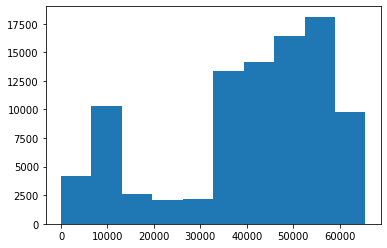

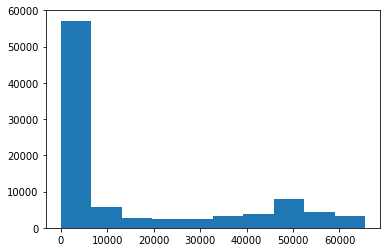

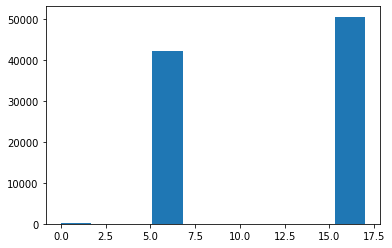

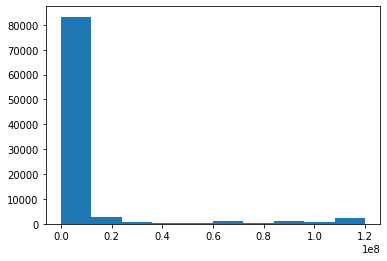

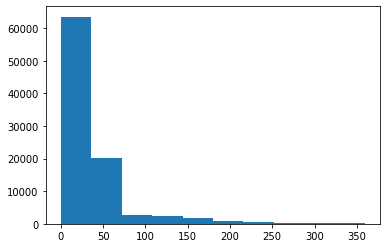

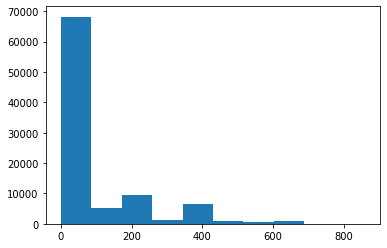

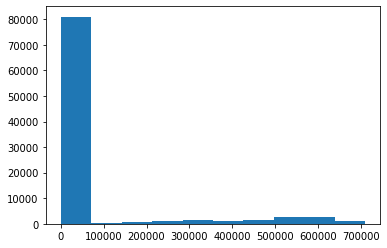

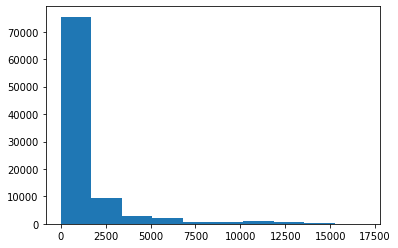

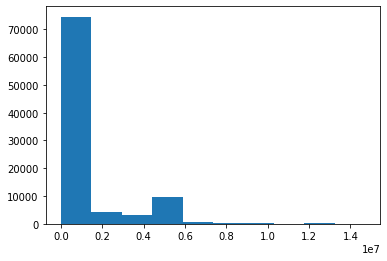

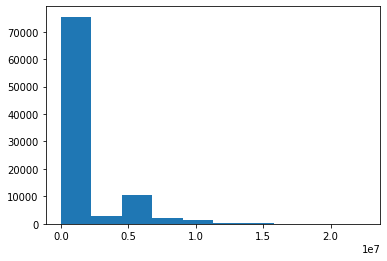

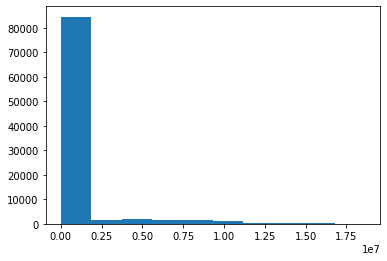

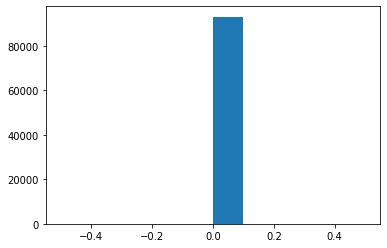

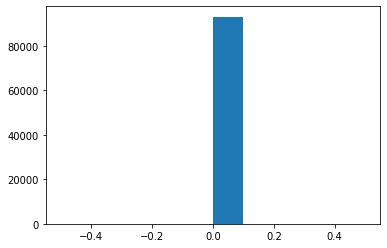

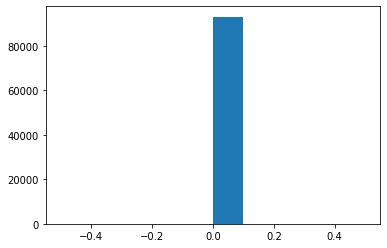

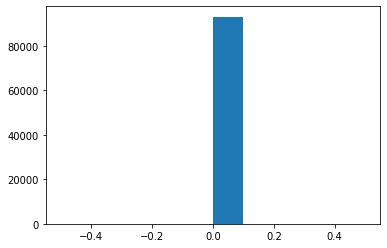

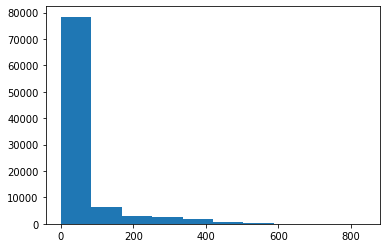

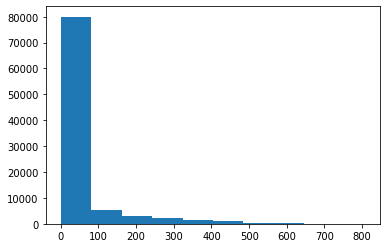

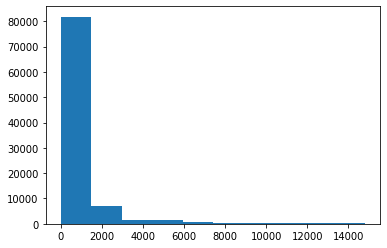

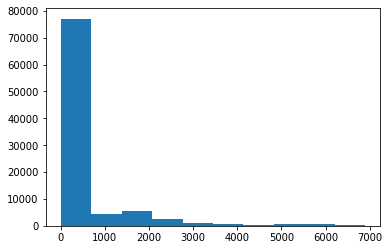

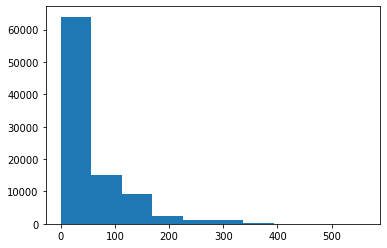

In [ ]:
for i in range(20):
  print('"',str(cols[i]),'",',sep='')
  plt.figure()
  plt.hist(temp[cols[i]])

"Fwd PSH Flags",
"Bwd PSH Flags",
"Fwd URG Flags",
"Bwd URG Flags",

Will be removed because they are mostly just one value

"FIN Flag Count",
"SYN Flag Count",
"RST Flag Count",
"PSH Flag Count",
"ACK Flag Count",
"URG Flag Count",
"CWE Flag Count",
"ECE Flag Count",
"Down/Up Ratio",
"Average Packet Size",
"Fwd Segment Size Avg",
"Bwd Segment Size Avg",
"Fwd Bytes/Bulk Avg",
"Fwd Packet/Bulk Avg",
"Fwd Bulk Rate Avg",
"Bwd Bytes/Bulk Avg",
"Bwd Packet/Bulk Avg",
"Bwd Bulk Rate Avg",
"Subflow Fwd Packets",
"Subflow Fwd Bytes",


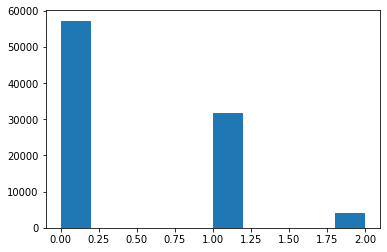

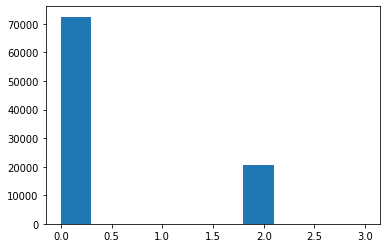

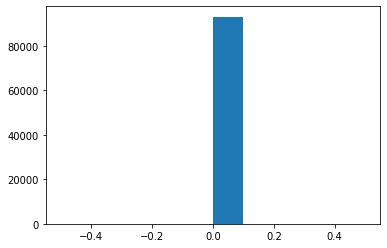

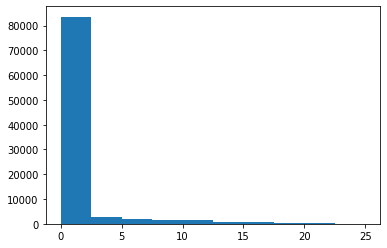

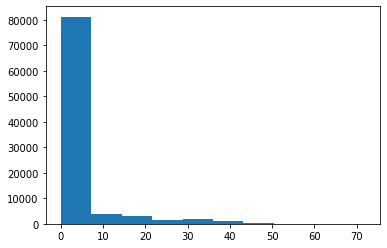

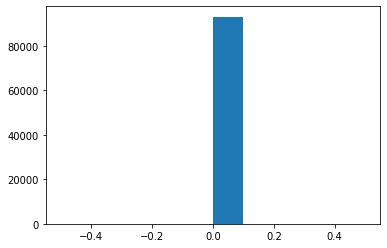

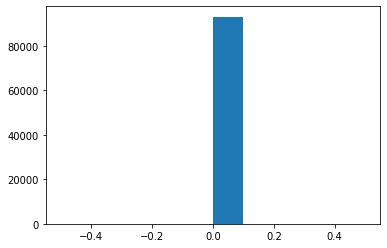

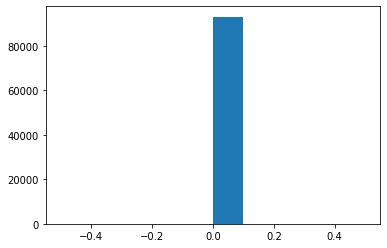

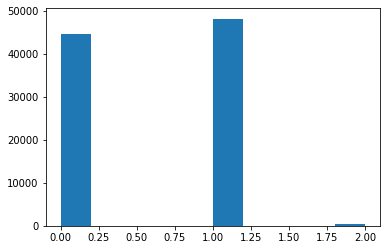

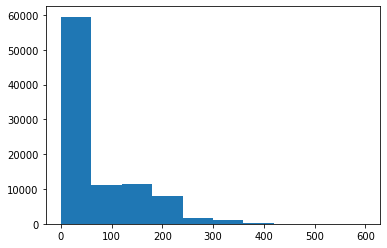

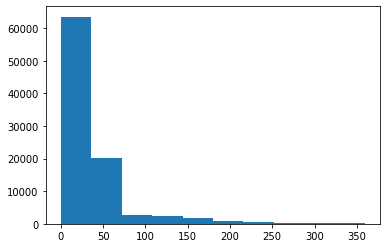

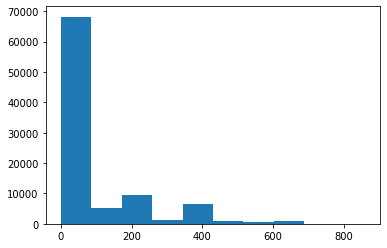

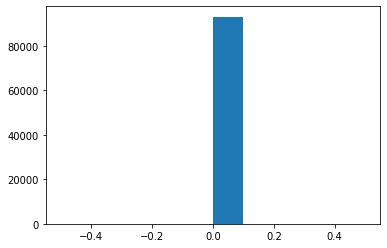

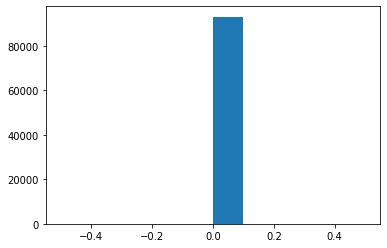

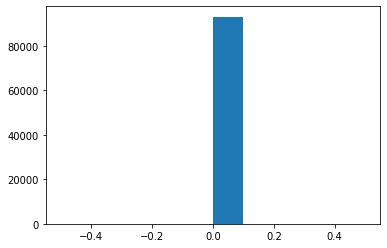

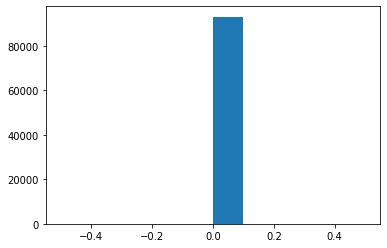

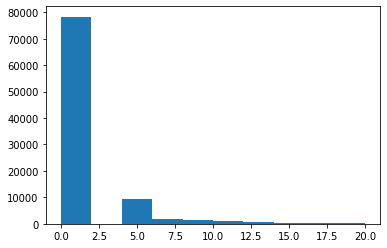

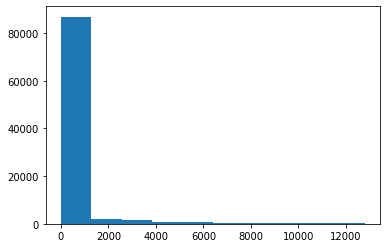

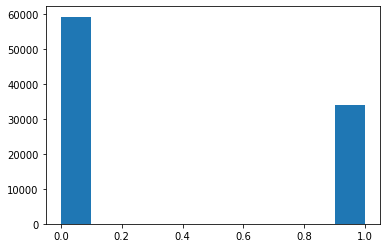

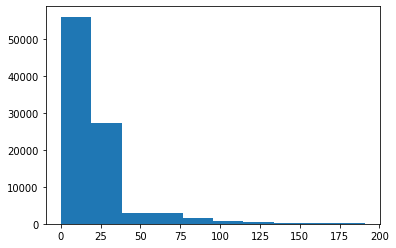

In [ ]:
for i in range(20,40):
  print('"',str(cols[i]),'",',sep='')
  plt.figure()
  plt.hist(temp[cols[i]])

"RST Flag Count",
"URG Flag Count",
"CWE Flag Count",
"ECE Flag Count",
"Fwd Bytes/Bulk Avg",
"Fwd Packet/Bulk Avg",
"Fwd Bulk Rate Avg",
"Bwd Bytes/Bulk Avg",

Will be removed because they are mostly just one value

"Subflow Bwd Packets",
"Subflow Bwd Bytes",
"FWD Init Win Bytes",
"Bwd Init Win Bytes",
"Fwd Act Data Pkts",
"Fwd Seg Size Min",
"Active Mean",
"Idle Mean",


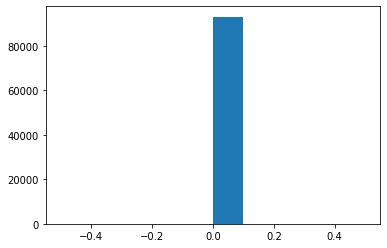

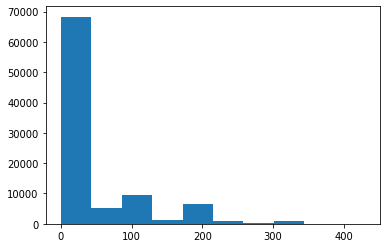

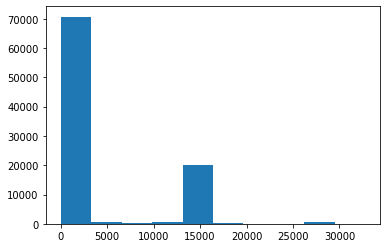

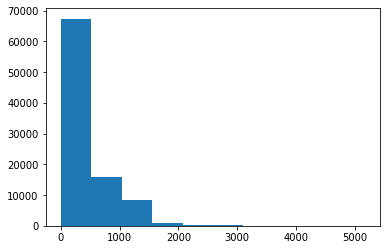

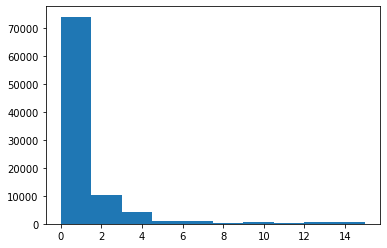

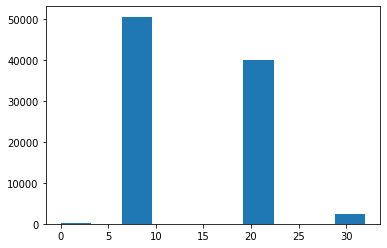

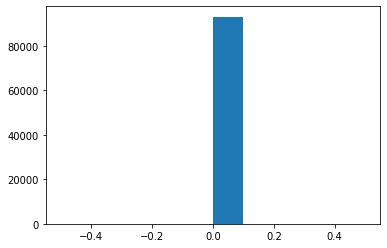

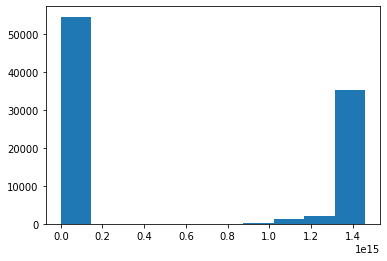

In [ ]:
for i in range(40,48):
  print('"',str(cols[i]),'",',sep='')
  plt.figure()
  plt.hist(temp[cols[i]])

"Subflow Bwd Packets",
"Active Mean"

Will be removed because they are mostly just one value

In [ ]:
li = ["Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags",
      "RST Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Fwd Bytes/Bulk Avg", "Fwd Packet/Bulk Avg", "Fwd Bulk Rate Avg", "Bwd Bytes/Bulk Avg",
      "Subflow Bwd Packets", "Active Mean"]
data3.drop(li, inplace=True, axis=1)

In [ ]:
data3

Flow ID          Src IP  Src Port  \
0          10.152.152.11-216.58.220.99-57158-443-6   10.152.152.11     57158   
1          10.152.152.11-216.58.220.99-57159-443-6   10.152.152.11     57159   
2          10.152.152.11-216.58.220.99-57160-443-6   10.152.152.11     57160   
3         10.152.152.11-74.125.136.120-49134-443-6   10.152.152.11     49134   
4       10.152.152.11-173.194.65.127-34697-19305-6   10.152.152.11     34697   
...                                            ...             ...       ...   
141525        10.8.8.246-224.0.0.252-55219-5355-17      10.8.8.246     55219   
141526        10.8.8.246-224.0.0.252-64207-5355-17      10.8.8.246     64207   
141527        10.8.8.246-224.0.0.252-61115-5355-17      10.8.8.246     61115   
141528        10.8.8.246-224.0.0.252-64790-5355-17      10.8.8.246     64790   
141529    80.239.235.110-10.8.8.246-11666-60245-17  80.239.235.110     11666   

                Dst IP  Dst Port  Protocol               Timestamp  \
0        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
1        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
2        216.58.220.99       443         6  24/07/2015 04:09:48 PM   
3       74.125.136.120       443         6  24/07/2015 04:09:48 PM   
4       173.194.65.127     19305         6  24/07/2015 04:09:45 PM   
...                ...       ...       ...                     ...   
141525     224.0.0.252      5355        17  22/05/2015 01:55:03 PM   
141526     224.0.0.252      5355        17  22/05/2015 02:09:05 PM   
141527     224.0.0.252      5355        17  22/05/2015 02:19:31 PM   
141528     224.0.0.252      5355        17  22/05/2015 02:29:55 PM   
141529      10.8.8.246     60245        17  22/05/2015 02:31:23 PM   

        Flow Duration  Fwd Packet Length Mean  Bwd Packet Length Mean  ...  \
0                 229                0.000000                  0.0000  ...   
1                 407                0.000000                  0.0000  ...   
2                 431                0.000000                  0.0000  ...   
3                 359                0.000000                  0.0000  ...   
4            10778451              109.187817                 16.6475  ...   
...               ...                     ...                     ...  ...   
141525         411806               22.000000                  0.0000  ...   
141526         411574               22.000000                  0.0000  ...   
141527         422299               22.000000                  0.0000  ...   
141528         411855               22.000000                  0.0000  ...   
141529      119990044               83.000000                 83.0000  ...   

        Subflow Fwd Packets  Subflow Fwd Bytes  Subflow Bwd Bytes  \
0                         0                  0                  0   
1                         0                  0                  0   
2                         0                  0                  0   
3                         0                  0                  0   
4                         0                 65                  6   
...                     ...                ...                ...   
141525                    1                 22                  0   
141526                    1                 22                  0   
141527                    1                 22                  0   
141528                    1                 22                  0   
141529                    0                 41                 41   

        FWD Init Win Bytes  Bwd Init Win Bytes  Fwd Act Data Pkts  \
0                     1892                1047                  0   
1                     1987                1047                  0   
2                     2049                1047                  0   
3                     2008                1047                  0   
4                     1382                2320                581   
...                    ...                 ...               

In [ ]:
cols = data3.describe().iloc[:,:].columns

In [ ]:
Q1 = data3[cols].quantile(0.1)
Q3 = data3[cols].quantile(0.9)
IQR = Q3 - Q1

df = data3[~((data3[cols] < (Q1 - 1.5 * IQR)) |(data3[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
data3['Label'].unique()

array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

In [ ]:
data3['Label'] = data3['Label'].map({'Non-Tor': 'Benign','NonVPN': 'Benign', 'Tor': 'Darknet', 'VPN': 'Darknet'})

In [ ]:
df['Label'] = df['Label'].map({'Non-Tor': 'Benign','NonVPN': 'Benign', 'Tor': 'Darknet', 'VPN': 'Darknet'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['Label.1'] = df['Label.1'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ce_ordinal = ce.OrdinalEncoder(cols=['Dst IP'])
df['Dst IP'] = ce_ordinal.fit_transform(df['Dst IP'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.pie(data3, names='Label', title='Data class')
fig.show()

In [ ]:
fig = px.pie(df, names='Label', title='Data class')
fig.show()

we can see here that removing the outliers did not ruin the balance of out data which means that we can remove them safely

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Balanced Classes')

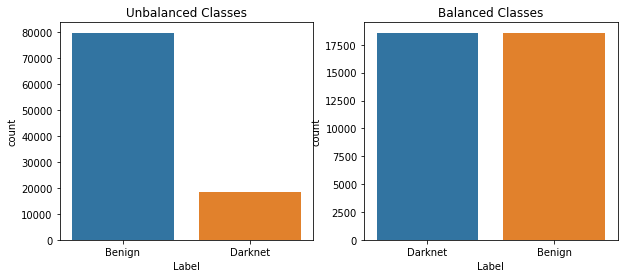

In [ ]:
# Shuffle the Dataset.
dff = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
darknet = dff.loc[dff['Label'] == 'Darknet']

#Randomly select 19 observations from the non-fraud (majority class)
benign = dff.loc[dff['Label'] == 'Benign'].sample(n=len(darknet),random_state=42)

# Concatenate both dataframes again
ndf = pd.concat([darknet, benign])

#plot the dataset after the undersampling
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)

sns.countplot('Label', data=df)
plt.title('Unbalanced Classes')

plt.subplot(1,2,2)

sns.countplot('Label', data=ndf)
plt.title('Balanced Classes')


balancing the labels ny using undersampling.

NOTE: this balanced dataset will only be used for certain visulizations for comparing between darknet and benign but for the model the unbalaced dataset will be used because after testing the unbalanced dataset had better results

In [ ]:
ndf = ndf.reset_index(drop = True)
ndf.head()

Flow ID      Src IP  Src Port  Dst IP  \
0   10.8.0.10-131.202.244.3-46499-53-17   10.8.0.10     46499    2132   
1  10.8.0.10-173.252.79.94-56147-3478-6   10.8.0.10     56147    5895   
2   10.8.0.10-131.202.244.5-50507-53-17   10.8.0.10     50507    5207   
3  10.8.8.134-10.8.8.130-15685-49539-17  10.8.8.134     15685    5914   
4   10.8.0.10-131.202.244.5-53055-53-17   10.8.0.10     53055    5207   

   Dst Port  Protocol               Timestamp  Flow Duration  \
0        53        17  14/04/2015 04:06:06 PM            655   
1      3478         6  14/04/2015 04:36:45 PM          80695   
2        53        17  14/04/2015 05:39:51 PM            631   
3     49539        17          5/6/2015 11:03       34219781   
4        53        17  14/04/2015 05:58:56 PM            743   

   Fwd Packet Length Mean  Bwd Packet Length Mean  ...  Subflow Fwd Packets  \
0                    34.0                   141.0  ...                    0   
1                    72.0                    52.0  ...                    0   
2                    37.0                   373.0  ...                    0   
3                    28.0                     0.0  ...                    1   
4                    33.0                   185.0  ...                    0   

   Subflow Fwd Bytes  Subflow Bwd Bytes  FWD Init Win Bytes  \
0                 17                 70                   0   
1                 48                 17                 229   
2                 18                186                   0   
3                 28                  0                   0   
4                 16                 92                   0   

   Bwd Init Win Bytes  Fwd Act Data Pkts  Fwd Seg Size Min     Idle Mean  \
0                   0                  0                 8  0.000000e+00   
1                  29                  0                32  1.429040e+15   
2                   0                  0                 8  0.000000e+00   
3                   0                 15                 8  1.433510e+15   
4                   0                  0                 8  0.000000e+00   

     Label          Label.1  
0  Darknet  audio-streaming  
1  Darknet  audio-streaming  
2  Darknet  audio-streaming  
3  Darknet    file-transfer  
4  Darknet  audio-streaming  

[5 rows x 40 columns]

In [ ]:
fig = px.pie(ndf, names='Label', title='Data class')
fig.show()

In [ ]:
fig = px.pie(df, names='Label.1', title='Data class.1')
fig.show()

here we can see the Applications used in the dataset the most note worthy ones being P2P which is uTorrent and Transmission (BitTorrent), Browsing like Firefox and Chrome and audio streaming like Vimeo and Youtube.

In [ ]:
cols = df.describe().iloc[:,:].columns

In [ ]:
fig = px.pie(df, names='Protocol', title='Protocol')
fig.show()

here we can see the different protocols used in the dataset the most used being 17 (UDP) then 6 (TCP)at almost the same amount and finally 0 (HOPOPT) being very rare.

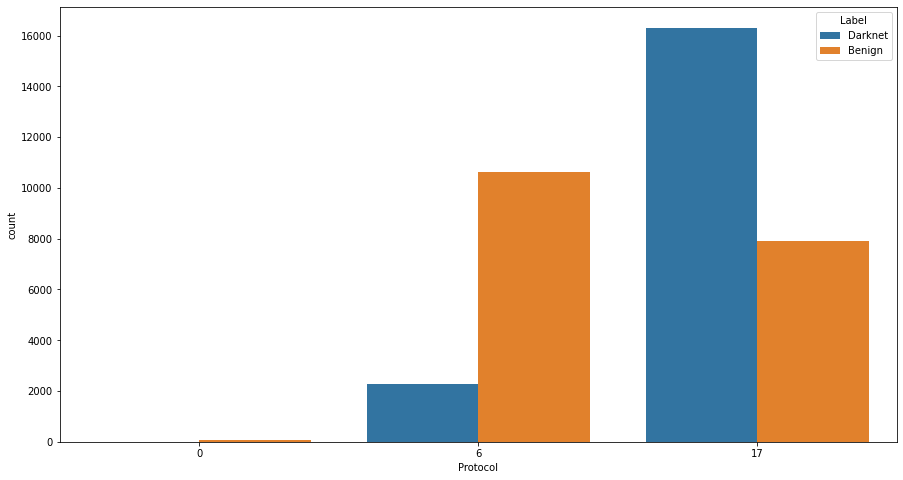

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x="Protocol", hue='Label', data=ndf) 

It seems that most Darknet data uses protocol 17 (UDP) which can be a factor for our classification.

also it's note worthy to point out that benign data most used protocol is 6 which is different than darknet at 17, and darknet is almost never 0 (but there's not enough data for that).

In [ ]:
plot1_1 = df.copy()
plot1_1=plot1_1[plot1_1['Label']=='Benign']

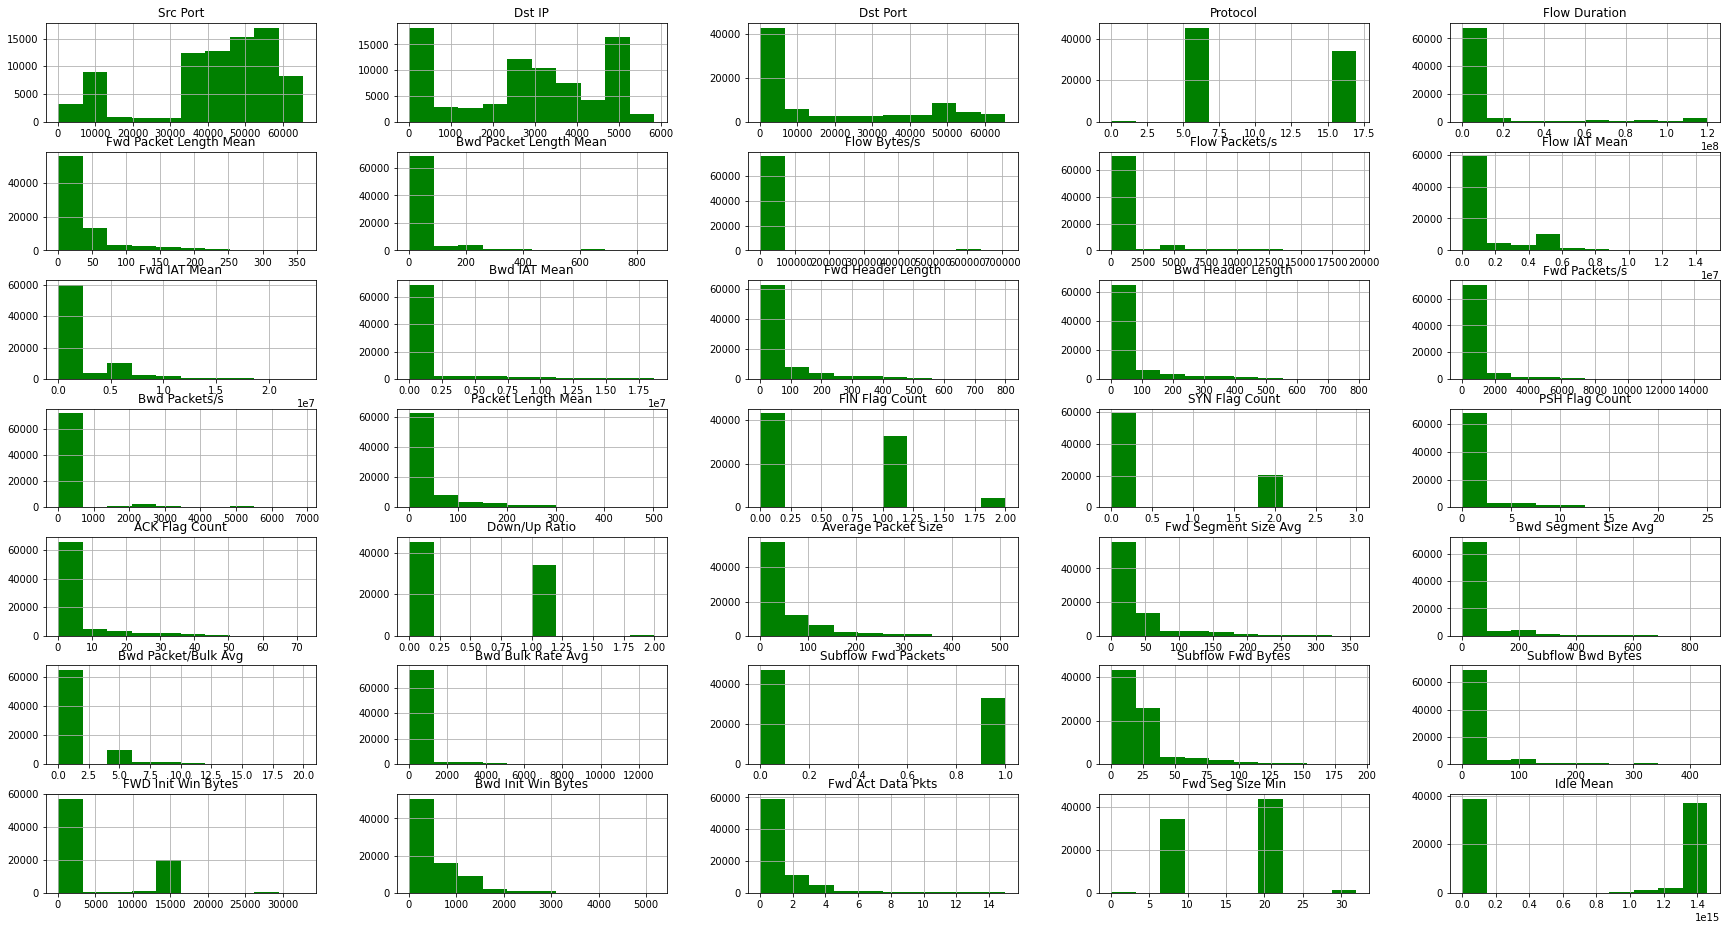

In [ ]:
plot1_1.hist(layout=(7,5), figsize=(30,16),color='green')

plt.show()

Benign histograms of the columns (unbalanced dataset)

In [ ]:
plot2 = ndf.copy()
plot2=plot2[plot2['Label']=='Darknet']

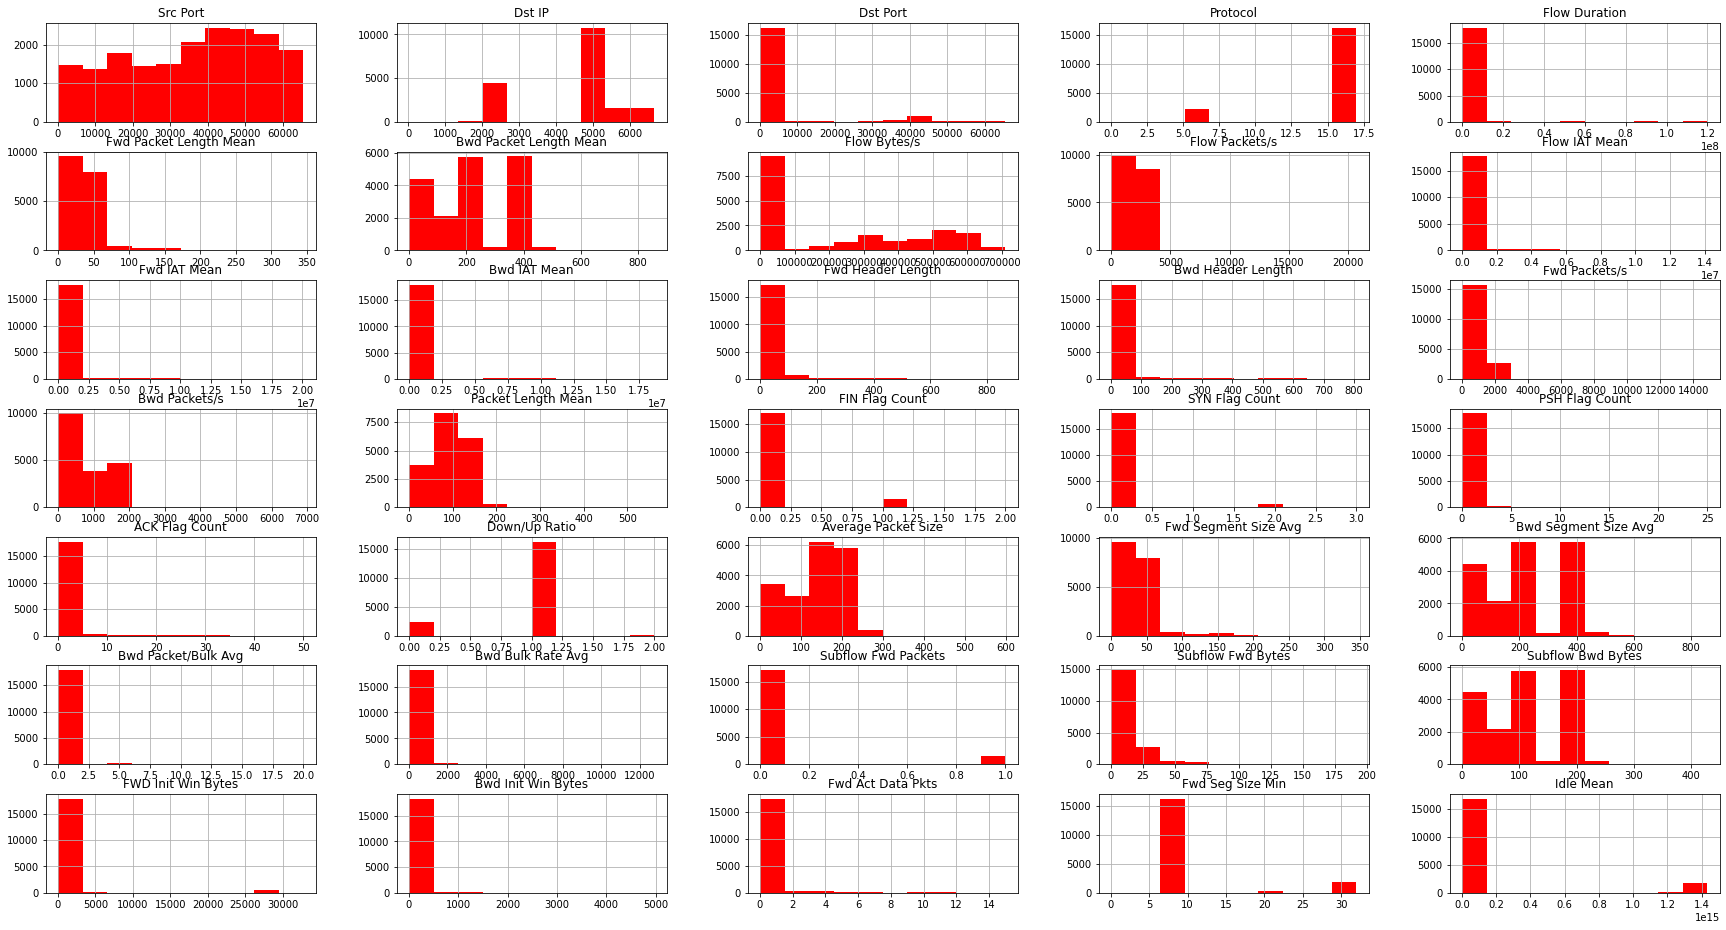

In [ ]:
plot2.hist(layout=(7,5), figsize=(30,16),color='red')

plt.show()

darknet histograms of the columns (balanced and unbalanced dataset)

through this we can see more columns that we can remove because they have the same distrubution in both darknet and benign which can affect the classification process.
columns to be removed:

"Flow Duration",
"Flow IAT Mean",
"Fwd IAT Mean",
"Bwd IAT Mean",
"Fwd Header Length",
"Bwd Header Length",
"Fwd Packets/s",
"PSH Flag Count",
"ACK Flag Count",
"Bwd Packet/Bulk Avg",
"Bwd Bulk Rate Avg",
"Fwd Act Data Pkts",
"Flow Bytes/s",
"SYN Flag Count"

In [ ]:
lists = ["Flow Duration", "Flow IAT Mean", "Fwd IAT Mean", "Bwd IAT Mean", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s",
         "PSH Flag Count", "ACK Flag Count", "Bwd Packet/Bulk Avg", "Bwd Bulk Rate Avg", "Fwd Act Data Pkts","Flow Bytes/s","SYN Flag Count"]
df.drop(lists,inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

Flow ID         Src IP  Src Port  Dst IP  \
0   10.152.152.11-216.58.220.99-57158-443-6  10.152.152.11     57158       1   
1   10.152.152.11-216.58.220.99-57159-443-6  10.152.152.11     57159       1   
2   10.152.152.11-216.58.220.99-57160-443-6  10.152.152.11     57160       1   
3  10.152.152.11-74.125.136.120-49134-443-6  10.152.152.11     49134       2   
5  10.152.152.11-173.194.65.127-54570-443-6  10.152.152.11     54570       3   

   Dst Port  Protocol               Timestamp  Fwd Packet Length Mean  \
0       443         6  24/07/2015 04:09:48 PM                     0.0   
1       443         6  24/07/2015 04:09:48 PM                     0.0   
2       443         6  24/07/2015 04:09:48 PM                     0.0   
3       443         6  24/07/2015 04:09:48 PM                     0.0   
5       443         6  24/07/2015 04:10:00 PM                    14.4   

   Bwd Packet Length Mean  Flow Packets/s  ...  Bwd Segment Size Avg  \
0                0.000000     8733.624454  ...              0.000000   
1                0.000000     4914.004914  ...              0.000000   
2                0.000000     4640.371230  ...              0.000000   
3                0.000000     5571.030641  ...              0.000000   
5               26.333333       18.986050  ...             26.333333   

   Subflow Fwd Packets  Subflow Fwd Bytes  Subflow Bwd Bytes  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
5                    0                  9                  9   

   FWD Init Win Bytes  Bwd Init Win Bytes  Fwd Seg Size Min     Idle Mean  \
0                1892                1047                20  0.000000e+00   
1                1987                1047                20  0.000000e+00   
2                2049                1047                20  0.000000e+00   
3                2008                1047                20  0.000000e+00   
5               14600                 913                20  1.437770e+15   

    Label          Label.1  
0  Benign  audio-streaming  
1  Benign  audio-streaming  
2  Benign  audio-streaming  
3  Benign  audio-streaming  
5  Benign  audio-streaming  

[5 rows x 26 columns]

In [ ]:
cols = df.describe().iloc[:,:].columns

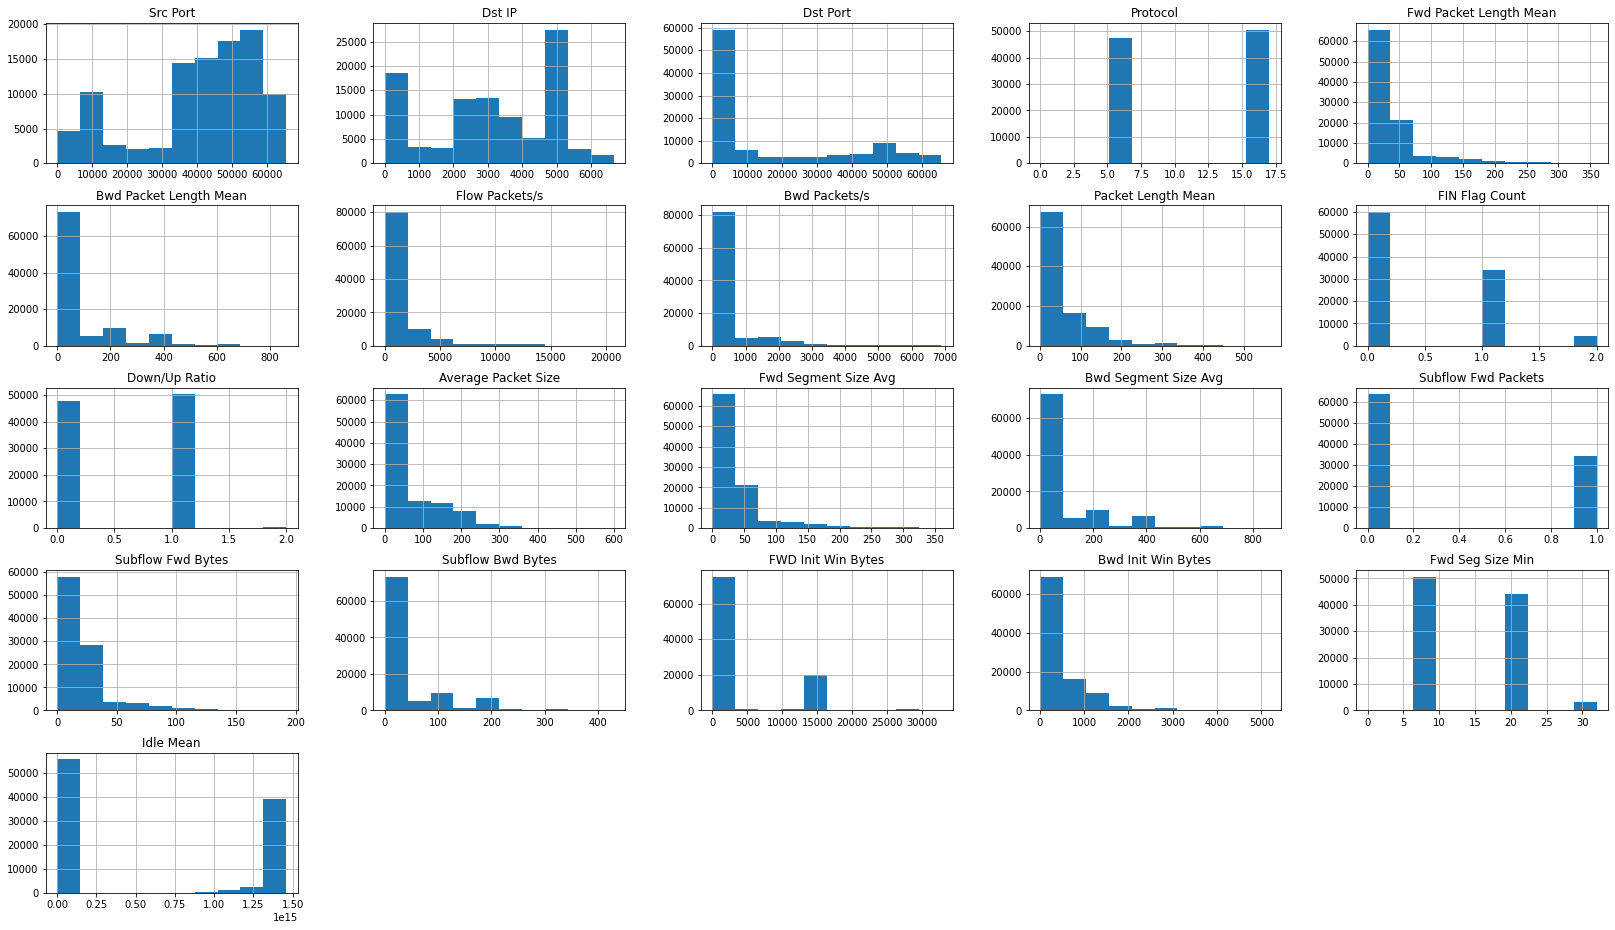

In [ ]:
df.hist(layout=(5,5), figsize=(28,16))

plt.show()

here is the distrubution of data in a histogram (unbalanced dataset)

In [ ]:
plot1_1 = df.copy()
plot1_1=plot1_1[plot1_1['Label']=='Benign']

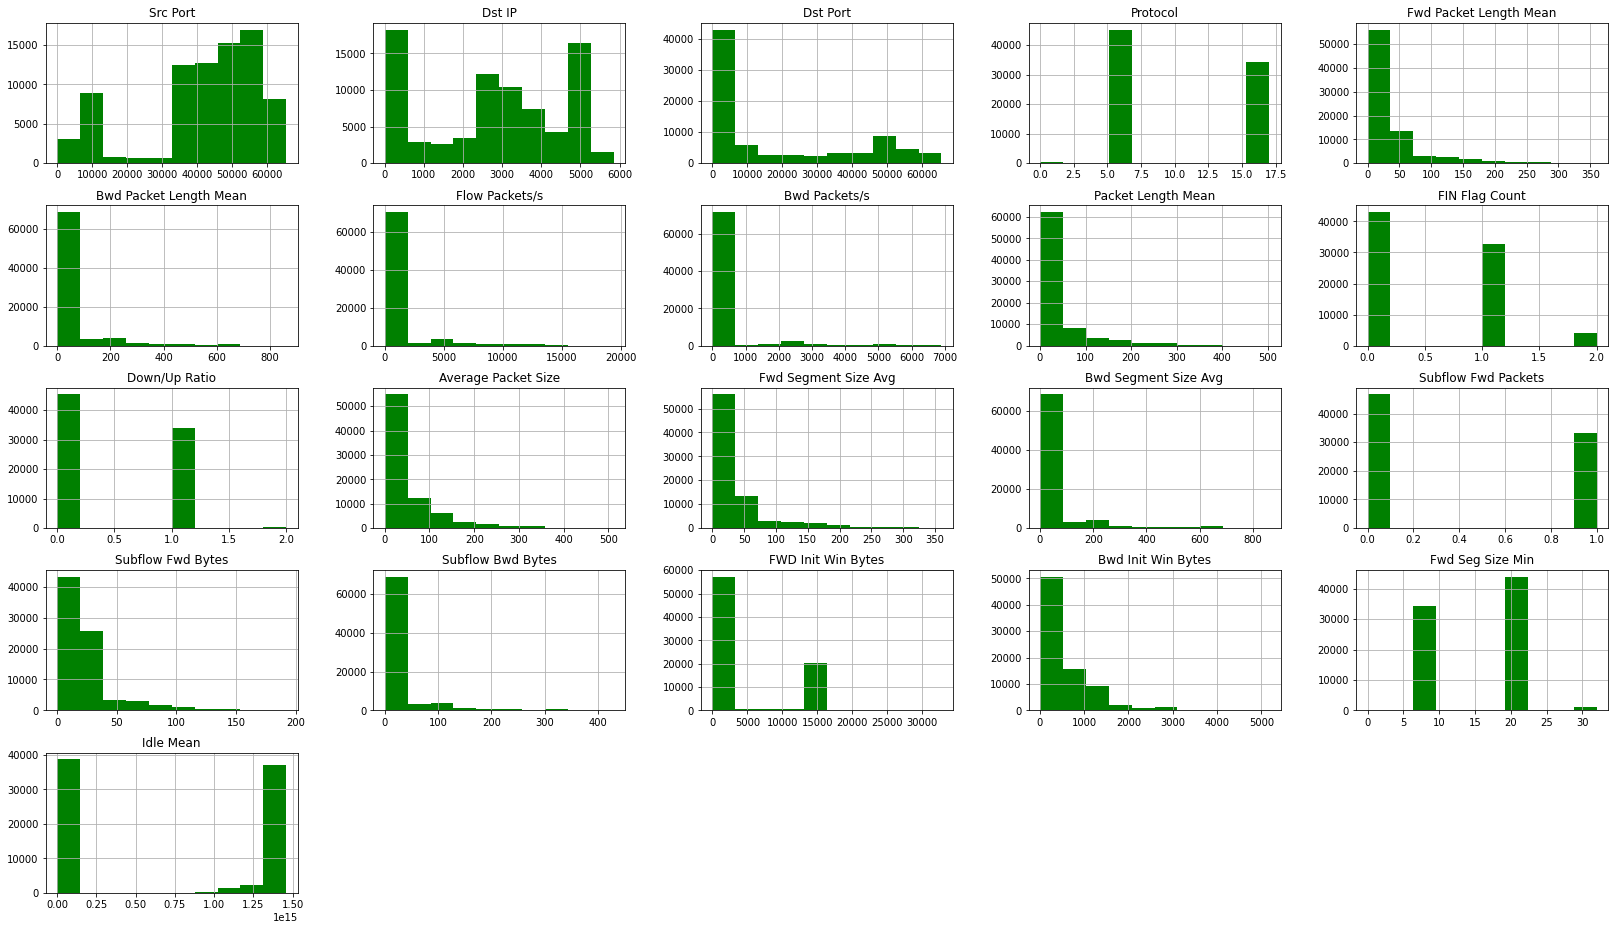

In [ ]:
plot1_1.hist(layout=(5,5), figsize=(28,16),color='green')

plt.show()

Benign histograms of the columns (unbalanced dataset)

In [ ]:
plot2 = df.copy()
plot2=plot2[plot2['Label']=='Darknet']

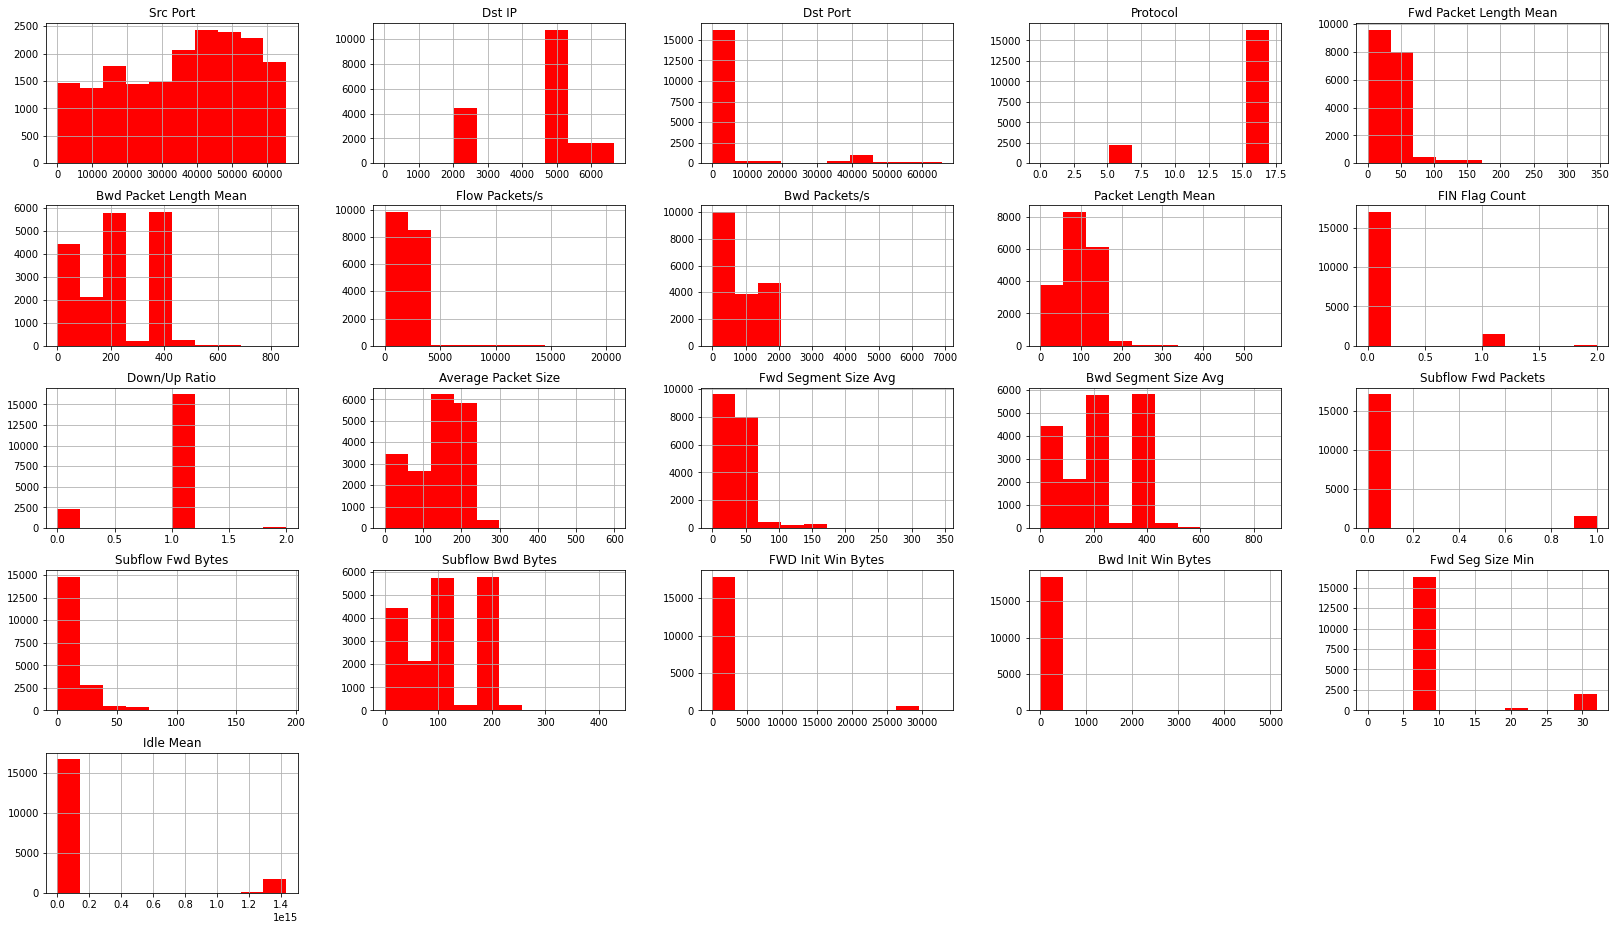

In [ ]:
plot2.hist(layout=(5,5), figsize=(28,16),color='red')

plt.show()

darknet histograms of the columns (balanced and unbalanced dataset)

In [ ]:
ndf.head()

Flow ID      Src IP  Src Port  Dst IP  \
0   10.8.0.10-131.202.244.3-46499-53-17   10.8.0.10     46499    2132   
1  10.8.0.10-173.252.79.94-56147-3478-6   10.8.0.10     56147    5895   
2   10.8.0.10-131.202.244.5-50507-53-17   10.8.0.10     50507    5207   
3  10.8.8.134-10.8.8.130-15685-49539-17  10.8.8.134     15685    5914   
4   10.8.0.10-131.202.244.5-53055-53-17   10.8.0.10     53055    5207   

   Dst Port  Protocol               Timestamp  Flow Duration  \
0        53        17  14/04/2015 04:06:06 PM            655   
1      3478         6  14/04/2015 04:36:45 PM          80695   
2        53        17  14/04/2015 05:39:51 PM            631   
3     49539        17          5/6/2015 11:03       34219781   
4        53        17  14/04/2015 05:58:56 PM            743   

   Fwd Packet Length Mean  Bwd Packet Length Mean  ...  Subflow Fwd Packets  \
0                    34.0                   141.0  ...                    0   
1                    72.0                    52.0  ...                    0   
2                    37.0                   373.0  ...                    0   
3                    28.0                     0.0  ...                    1   
4                    33.0                   185.0  ...                    0   

   Subflow Fwd Bytes  Subflow Bwd Bytes  FWD Init Win Bytes  \
0                 17                 70                   0   
1                 48                 17                 229   
2                 18                186                   0   
3                 28                  0                   0   
4                 16                 92                   0   

   Bwd Init Win Bytes  Fwd Act Data Pkts  Fwd Seg Size Min     Idle Mean  \
0                   0                  0                 8  0.000000e+00   
1                  29                  0                32  1.429040e+15   
2                   0                  0                 8  0.000000e+00   
3                   0                 15                 8  1.433510e+15   
4                   0                  0                 8  0.000000e+00   

     Label          Label.1  
0  Darknet  audio-streaming  
1  Darknet  audio-streaming  
2  Darknet  audio-streaming  
3  Darknet    file-transfer  
4  Darknet  audio-streaming  

[5 rows x 40 columns]

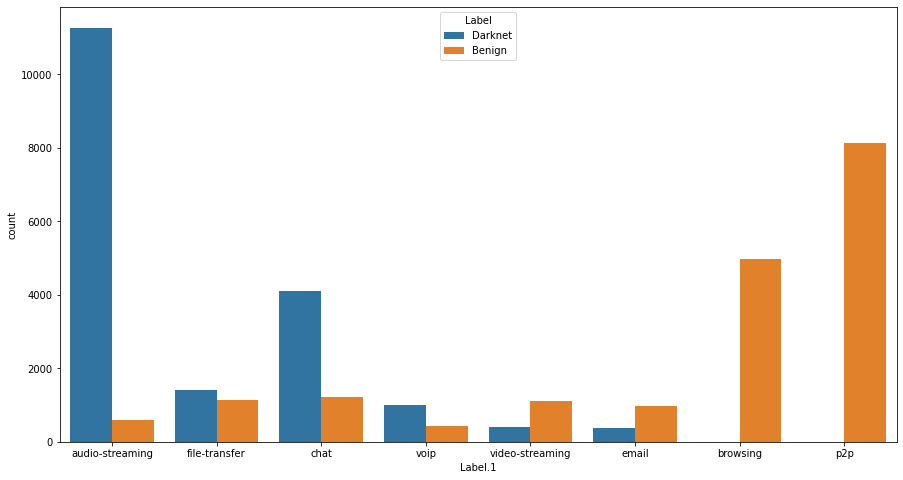

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x="Label.1", hue='Label', data=ndf) 

NOTE: This is the balanced data

This plot can really help pin point where darknet data really happens like for example most benign is in P2P (uTorrent and Transmission (BitTorrent)) and Browsing (Google and Firefox) but there's no Darknet data there instead Darknet is mostly in Audio-Streaming and Chat

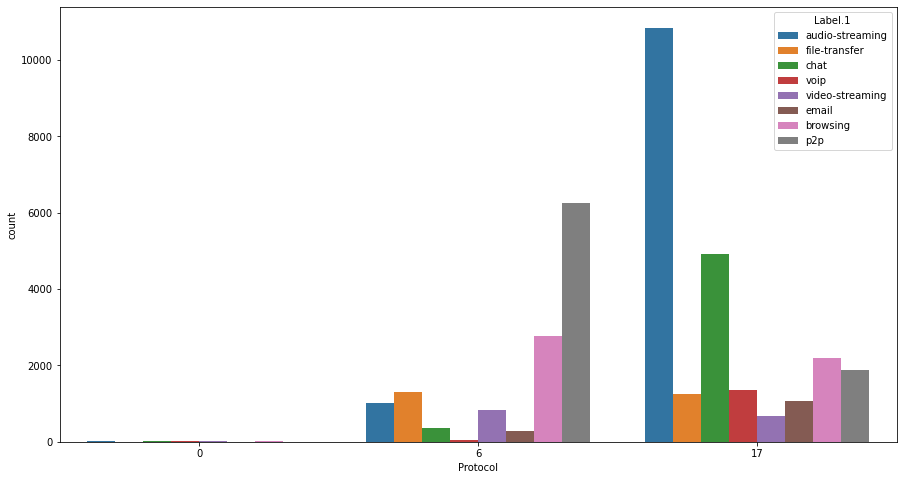

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x="Protocol", hue='Label.1', data=ndf) 

Here we can see the distrubution of the application use with protocol use, the biggest changes in the protocol use is between audio-streaming, chat and p2p.
P2P is mostly in protocol 6 but in protocol 17 it sees a big drop at the same time audio-streaming and chat see a massive increase.

This tells use which protocols these applications mostly use, and with the knowledge of where darknet and benign lay in both protocol and application list this alone can help us with classification of the data being either Benign or Darknet.

In [ ]:
df['Label.1'].unique()

array(['audio-streaming', 'browsing', 'chat', 'email', 'file-transfer',
       'p2p', 'video-streaming', 'voip'], dtype=object)

#Model data3

In [ ]:
data = df.copy()
data.drop('Timestamp', inplace=True, axis=1)
data['Label.1'] = data['Label.1'].map({'audio-streaming':0,'file-transfer':1,'chat':2,'voip':3,'video-streaming':4,'email':5,'browsing':6,'p2p':7})
data['Protocols']=data['Protocol']
data.drop('Protocol',inplace=True,axis=1)
data['Class']=data['Label']
data.drop('Label',inplace=True,axis=1)

In [ ]:
data['Dst IP']

0            1
1            1
2            1
3            2
5            3
          ... 
141524    5259
141525    5200
141526    5200
141527    5200
141528    5200
Name: Dst IP, Length: 98337, dtype: int64

In [ ]:
x = data.iloc[ : ,2:24].values
y = data.iloc[ : ,24].values
scores_list = []

for i in range(20):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
  classifier = KNeighborsClassifier(n_neighbors=3)
  classifier.fit(x_train, y_train)
  ypre = classifier.predict(x_test)
  scores_list.append(accuracy_score(y_test,ypre))

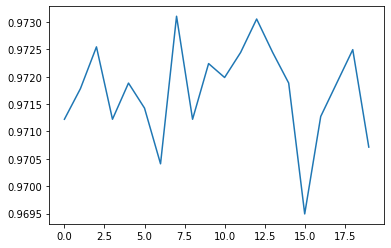

In [ ]:
plt.plot(range(20),scores_list)

In [ ]:
print("accuracy is",accuracy_score(y_test,ypre)*100,"%")

accuracy is 97.07138499084807 %


#Final Evaluation

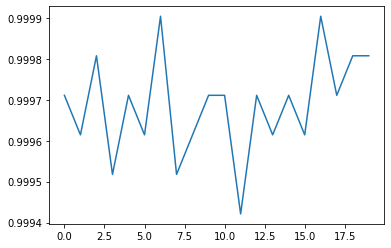

CIC-MalMem-2022 model

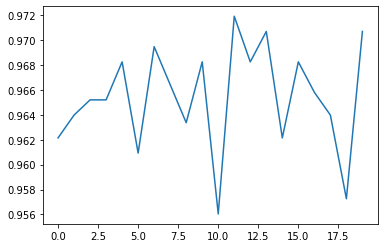

**CIC-Evasive-PDFMal2022 Model**

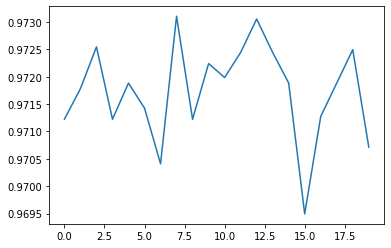

**CIC-Darknet2020 Model**

The final evaluation of the best model accuracy

1-CIC-MalMem-2022 model: has the best accuracy with consistent 99.9% even hitting 99.99% at the peak of 20 model Evaluations which is very good for malware classification model.

the second would be CIC-Darknet2020 Model because even tho CIC-Darknet2020 Model and CIC-Evasive-PDFMal2022 Model look like they provide the same results Darknet model has less range of accuracy drop with a better peak than CIC-Evasive-PDFMal2022 Model.